```
BEGIN ASSIGNMENT 
init_cell: true 
export_cell: true 
files:
    - roulette_wheel.csv
    - roulette_wheel.jpeg
    - top_movies_2017.csv
    - d8error.py
    - errorConfig.json
export_cell:
    pdf: false
    force_save: false
solutions_pdf: true
template_pdf: true
generate:
    points_possible: 87.0
    show_stdout: true
    filtering: true
    pagebreaks: true
    zips: false
```


# Homework 6: Probability, Simulation, Estimation, and Assessing Models

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though the tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

## 1. Roulette

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
import d8error

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. The table `wheel` is a representation of a Nevada roulette wheel. **Note that *both* columns consist of strings.** Below is an example of a roulette wheel!

<img src="roulette_wheel.jpeg" width="330px">

Run the cell below to load the `wheel` table.

In [2]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Betting on Red ###
If you bet on *red*, you are betting that the winning pocket will be red. This bet *pays 1 to 1*. That means if you place a one-dollar bet on red, then:

- If the winning pocket is red, you gain 1 dollar. That is, you get your original dollar back, plus one more dollar.
- if the winning pocket is not red, you lose your dollar. In other words, you gain -1 dollars.

Let's see if you can make money by betting on red at roulette.

**Question 1.** Define a function `dollar_bet_on_red` that takes the name of a color and returns your gain in dollars if that color had won and you had placed a one-dollar bet on red. Remember that the gain can be negative. Make sure your function returns an integer. **(4 points)**

*Note:* You can assume that the only colors that will be passed as arguments are red, black, and green. Your function doesn't have to check that.

```
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 2
 - 2
```

In [3]:
""" # BEGIN PROMPT
def dollar_bet_on_red(...):
    ...
"""; # END PROMPT
# BEGIN SOLUTION NO PROMPT
def dollar_bet_on_red(color):
    if color == 'red':
        return 1
    else:
        return -1
# END SOLUTION

In [4]:
# TEST
dollar_bet_on_red('red') == 1

True

In [5]:
# HIDDEN TEST
dollar_bet_on_red('green') == -1

True

Run the cell below to make sure your function is working.

In [6]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


**Question 2.** Add a column labeled `Winnings: Red` to the table `wheel`. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. Your code should use the function `dollar_bet_on_red`. **(4 points)**

```
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 4
```

In [7]:
red_winnings = wheel.apply(dollar_bet_on_red, 'Color') # SOLUTION
wheel = wheel.with_columns('Winnings: Red', red_winnings) # SOLUTION
wheel

Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [8]:
# TEST
# Make sure your column names are correct
wheel.labels[2] == "Winnings: Red"

True

In [9]:
# HIDDEN TEST
sum(wheel.column("Winnings: Red")) == -2

True

### Simulating 10 Bets on Red
Roulette wheels are set up so that each time they are spun, the winning pocket is equally likely to be any of the 38 pockets regardless of the results of all other spins. Let's see what would happen if we decided to bet one dollar on red each round.

**Question 3.** Create a table `ten_bets` by sampling the table `wheel` to simulate 10 spins of the roulette wheel. Your table should have the same three column labels as in `wheel`. Once you've created that table, set `sum_bets` to your net gain in all 10 bets, assuming that you bet one dollar on red each time. **(4 points)**

*Hint:* It may be helpful to print out `ten_bets` after you create it!

```
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 4
```

In [10]:
ten_bets = wheel.sample(10) # SOLUTION
""" # BEGIN PROMPT
sum_bets = ...(ten_bets.column('Winnings: Red'))
"""; # END PROMPT
# BEGIN SOLUTION NO PROMPT
sum_bets = sum(ten_bets.column('Winnings: Red'))
# END SOLUTION
sum_bets

4

In [11]:
# TEST
# If this test isn't passing, try running the cells from the top.
set(["Pocket", "Color", "Winnings: Red"]) == set(ten_bets.labels)

True

In [12]:
# HIDDEN TEST
ten_bets.num_rows == 10

True

Run the cells above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

**Question 4.** Let's see what would happen if you made more bets. Define a function `net_gain_red` that takes the number of bets and returns the net gain in that number of one-dollar bets on red. **(4 points)**

*Hint:* You should use your `wheel` table within your function.

```
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 4
```

In [13]:
""" # BEGIN PROMPT
def net_gain_red(...):
    ...
"""; # END PROMPT
# BEGIN SOLUTION NO PROMPT
def net_gain_red(num_bets):
    all_bets = wheel.sample(num_bets)
    return sum(all_bets.column('Winnings: Red'))
# END SOLUTION

In [14]:
# TEST
net_gain_red(10000) != net_gain_red(10000)

True

In [15]:
# HIDDEN TEST
-10000 <= net_gain_red(10000) <= 10000

True

Run the cell below a few times to make sure that the results are similar to those you observed in the previous exercise.

In [16]:
net_gain_red(10)

0

**Question 5.** Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. After the cell is run, `all_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red. **(4 points)**

*Hint:* Think about which computational tool might be helpful for simulating a process multiple times. Lab 5 might be a good resource to look at!

*Note:* This cell might take a few seconds to run.

```
BEGIN QUESTION
name: q1_5
manual: false
points:
 - 0
 - 4
```

In [17]:
num_bets = 200 # SOLUTION
repetitions = 10000 # SOLUTION

all_gains_red = make_array() # SOLUTION
# BEGIN SOLUTION
for i in np.arange(repetitions):
    new_net_gain = net_gain_red(num_bets)
    all_gains_red = np.append(all_gains_red, new_net_gain)
# END SOLUTION

len(all_gains_red) # Do not change this line! Check that all_gains_red is length 10000.

10000

In [18]:
# TEST
len(all_gains_red) == 10000

True

In [19]:
# HIDDEN TEST
np.count_nonzero(all_gains_red <= 100) == 10000

True

Run the cell below to visualize the results of your simulation.

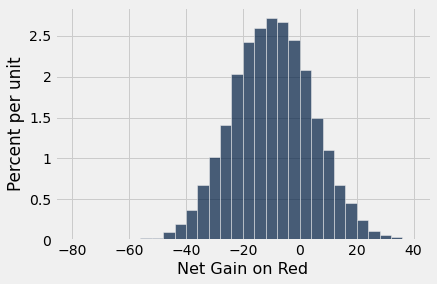

In [20]:
gains = Table().with_columns('Net Gain on Red', all_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

**Question 6:** Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question. **(4 points)**

```
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 4
```

In [21]:
loss_more_than_50 = True # SOLUTION

In [22]:
# TEST
type(loss_more_than_50) == bool

True

In [23]:
# HIDDEN TEST
loss_more_than_50 == True

True

### Betting on a Split ###
If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bets pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

**Question 7.** Define a function `dollar_bet_on_split` that takes a pocket number and returns your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

*Hint:* Remember that the pockets are represented as strings.

```
BEGIN QUESTION
name: q1_7
manual: false
points:
 - 2
 - 1
 - 1
```

In [24]:
""" # BEGIN PROMPT
def dollar_bet_on_split(...):
    ...
"""; # END PROMPT
# BEGIN SOLUTION NO PROMPT
def dollar_bet_on_split(x): 
    if x == '5':
        return 17
    elif x == '6':
        return 17
    else:
        return -1
# END SOLUTION

In [25]:
# TEST
dollar_bet_on_split('5') == 17

True

In [26]:
# HIDDEN TEST
dollar_bet_on_split('6') == 17

True

In [27]:
# HIDDEN TEST
dollar_bet_on_split('10') == -1

True

Run the cell below to check that your function is doing what it should.

In [28]:
print(dollar_bet_on_split('5'))
print(dollar_bet_on_split('6'))
print(dollar_bet_on_split('00'))
print(dollar_bet_on_split('23'))

17
17
-1
-1


**Question 8.** Add a column `Winnings: Split` to the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

```
BEGIN QUESTION
name: q1_8
manual: false
points:
 - 0
 - 4
```

In [29]:
split_winnings = wheel.apply(dollar_bet_on_split, 'Pocket') # SOLUTION
wheel = wheel.with_columns('Winnings: Split', split_winnings) # SOLUTION
wheel.show(5) # Do not change this line.

Pocket,Color,Winnings: Red,Winnings: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1


In [30]:
# TEST
# Make sure your column names are correct
wheel.labels[3] == "Winnings: Split"

True

In [31]:
# HIDDEN TEST
sum(wheel.column("Winnings: Split")) == -2

True

**Question 9.** Simulate the net gain in 200 one-dollar bets on the 5-6 split, repeating the process 10,000 times and saving your gains in the array `all_gains_split`. **(4 points)**

*Hint:* Your code in Questions 4 and 5 may be helpful here!

```
BEGIN QUESTION
name: q1_9
manual: false
points:
 - 0
 - 4
```

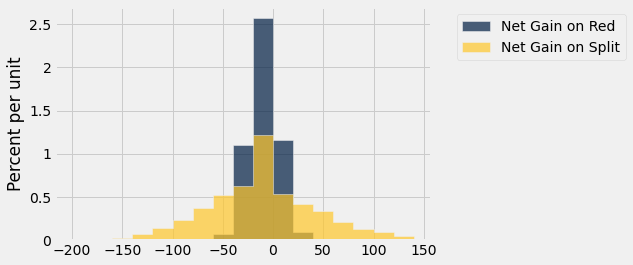

In [32]:
all_gains_split = make_array() # SOLUTION

# BEGIN SOLUTION
def net_gain_split(n):
    n_bets = wheel.sample(n)
    return sum(n_bets.column('Winnings: Split'))
    
for i in np.arange(repetitions):
    new_net_gain = net_gain_split(num_bets)
    all_gains_split = np.append(all_gains_split, new_net_gain) 
# END SOLUTION

# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', all_gains_split)
gains.hist(bins = np.arange(-200, 150, 20))

In [33]:
# TEST
len(all_gains_split) == 10000

True

In [34]:
# HIDDEN TEST
np.count_nonzero(all_gains_split >= -200) == 10000

True

**Question 10.** Look carefully at the visualization above, and assign `histogram_statements` to an array of the numbers of each statement below that can be correctly inferred from the overlaid histogram. **(4 points)**

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

*Hint:* We've already seen one of these statements in a prior question.

```
BEGIN QUESTION
name: q1_10
manual: false
points:
 - 0
 - 0
 - 4
```

In [35]:
histogram_statements = make_array(1, 2, 3) # SOLUTION

In [36]:
# TEST
# Make sure histogram_statements is an array.
import numpy as np
type(histogram_statements) == np.ndarray

True

In [37]:
# TEST
# Make sure you have set histogram_statements to an array with at least 1 number
1 <= histogram_statements.item(0) <= 3

True

In [38]:
# HIDDEN TEST
histogram_statements.item(0) == 1 and histogram_statements.item(1) == 2 and histogram_statements.item(2) == 3

True

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.

## 2. Chances

Before you do this exercise, make sure you understand the logic behind all the examples in [Section 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html). 

Good ways to approach probability calculations include:

- Thinking one trial at a time: What does the first one have to be? Then what does the next one have to be?
- Breaking up the event into distinct ways in which it can happen.
- Seeing if it is easier to find the chance that the event does not happen.

### Finding Chances

On each spin of a roulette wheel, all 38 pockets are equally likely to be the winner regardless of the results of other spins. Among the 38 pockets, 18 are red, 18 black, and 2 green. In each part below, write an expression that evaluates to the chance of the event described.

**Question 1.** The winning pocket is black on all of the first three spins. **(4 points)**

```
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 4
```

In [39]:
first_three_black = (18/38)**3 # SOLUTION

In [40]:
# TEST
# Your probability output should be a value between 0 and 1.
0 < first_three_black < 1

True

In [41]:
# HIDDEN TEST
first_three_black

0.10628371482723427

**Question 2.** The color green never wins in the first 10 spins. **(4 points)**

```
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 4
```

In [42]:
no_green = (36/38)**10 # SOLUTION

In [43]:
# TEST
# Your probability output should be a value between 0 and 1.
0 < no_green < 1

True

In [44]:
# HIDDEN TEST
0.582 < no_green < 0.583

True

**Question 3.** The color green wins at least once on the first 10 spins. **(4 points)**

```
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 4
```

In [45]:
at_least_one_green = 1 - (36/38)**10 # SOLUTION

In [46]:
# TEST
# Your probability output should be a value between 0 and 1.
0 < at_least_one_green < 1

True

In [47]:
# HIDDEN TEST
0.417643346770 <= at_least_one_green <= 0.417643346771

True

**Question 4.** Two of the three colors never win in the first 10 spins. **(4 points)**

*Hint:* Imagine the event with the colors red, yellow, and orange. What situation(s) lead to two of the three colors never winning in the first 10 spins?

```
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 0
 - 4
```

In [48]:
lone_winners = (18/38)**10 + (18/38)**10 + (2/38)**10 # SOLUTION

In [49]:
# TEST
# Your probability output should be a value between 0 and 1.
0 < lone_winners < 1

True

In [50]:
# HIDDEN TEST
lone_winners

0.0011374153385028288

### Comparing Chances
In each of Questions 5-7, two events A and B are described. Choose from one of the following three options and set each answer variable to a single integer:

1. Event A is more likely than Event B
2. Event B is more likely than Event A
3. The two events have the same chance.

You should be able to make the choices **without calculation**. Good ways to approach this exercise include imagining carrying out the chance experiments yourself, one trial at a time, and by thinking about the [law of averages](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#the-law-of-averages).

**Question 5.** A child picks four times at random from a box that has four toy animals: a bear, an elephant, a giraffe, and a kangaroo. **(4 points)**

- Event A: all four different animals are picked (assuming the child picks without replacement)
- Event B: all four different animals are picked (assuming the child picks with replacement)

```
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 0
 - 4
```

In [51]:
toys_option = 1 # SOLUTION

In [52]:
# TEST
# Make sure you are setting toys_option to an int
type(toys_option) == int

True

In [53]:
# TEST
# toys_option should be assigned to either 1, 2 or 3.
1 <= toys_option <= 3

True

In [54]:
# HIDDEN TEST
toys_option == 1

True

**Question 6.** In a lottery, two numbers are drawn at random with replacement from the integers 1 through 1000. **(4 points)**

- Event A: The number 8 is picked on both draws
- Event B: The same number is picked on both draws

```
BEGIN QUESTION
name: q2_6
manual: false
points:
 - 0
 - 0
 - 4
```

In [55]:
lottery_option = 2 # SOLUTION

In [56]:
# TEST
# Make sure you are setting lottery_option to an int
type(lottery_option) == int

True

In [57]:
# TEST
# toys_option should be assigned to either 1, 2 or 3.
1 <= lottery_option <= 3

True

In [58]:
# HIDDEN TEST
lottery_option == 2

True

**Question 7.** A fair coin is tossed repeatedly. **(4 points)**

- Event A: There are 60 or more heads in 100 tosses
- Event B: There are 600 or more heads in 1000 tosses

*Hint*: Think about the law of averages!

```
BEGIN QUESTION
name: q2_7
manual: false
points:
 - 0
 - 0
 - 4
```

In [59]:
coin_option = 1 # SOLUTION

In [60]:
# TEST
# Make sure you are setting coin_option to an int
type(coin_option) == int

True

In [61]:
# TEST
1 <= coin_option <= 3

True

In [62]:
# HIDDEN TEST
coin_option == 1

True

## 3. Three Ways Python Draws Random Samples

You have learned three ways to draw random samples using Python:

- `tbl.sample` draws a random sample of rows from the table `tbl`. The output is a table consisting of the sampled rows. 

- `np.random.choice` draws a random sample from a population whose elements are in an array. The output is an array consisting of the sampled elements.

- `sample_proportions` draws from a categorical distribution whose proportions are in an array. The output is an array consisting of the sampled proportions in all the categories. 

In [63]:
# Look through this code and run this cell for questions 1 and 2
top = Table.read_table('top_movies_2017.csv').select(0, 1)
top.show(3)

Title,Studio
Gone with the Wind,MGM
Star Wars,Fox
The Sound of Music,Fox


In [64]:
# Look through this code and run this cell for questions 1 and 2
studios_with_counts = top.group('Studio').sort('count', descending=True)
studios_with_counts.show(3)

Studio,count
Buena Vista,35
Warner Brothers,29
Paramount,25


In [65]:
# Look through this code and run this cell for questions 1 and 2
studios_of_all_movies = top.column('Studio')
distinct_studios = studios_with_counts.column('Studio')

print("studios_of_all_movies:", studios_of_all_movies[:10], "...")
print("\n distinct_studios:", distinct_studios)

studios_of_all_movies: ['MGM' 'Fox' 'Fox' 'Universal' 'Paramount' 'Paramount' 'Universal' 'MGM'
 'Warner Brothers' 'Disney'] ...

 distinct_studios: ['Buena Vista' 'Warner Brothers' 'Paramount' 'Fox' 'Universal' 'Disney'
 'Columbia' 'MGM' 'United Artists' 'Newline' 'Paramount/Dreamworks' 'Sony'
 'Dreamworks' 'Lionsgate' 'RKO' 'Tristar' 'AVCO' 'IFC' 'Metro' 'NM'
 'Orion' 'Selz.' 'Sum.']


In [66]:
# Look through this code and run this cell for questions 1 and 2
studio_counts_only = studios_with_counts.column('count')
studio_proportions_only = studio_counts_only / sum(studio_counts_only)

print("studio_counts_only:", studio_counts_only)
print("\n studio_proportions_only:", studio_proportions_only)

studio_counts_only: [35 29 25 24 23 11  9  7  6  5  4  4  3  3  3  2  1  1  1  1  1  1  1]

 studio_proportions_only: [0.175 0.145 0.125 0.12  0.115 0.055 0.045 0.035 0.03  0.025 0.02  0.02
 0.015 0.015 0.015 0.01  0.005 0.005 0.005 0.005 0.005 0.005 0.005]


In Questions 1 and 2, we will present a scenario. Determine which three of the following six options are true in regards to what the question is asking, and list them in the following answer cell. If your answer includes any of (i)-(iii), state what you would fill in the blank to make it true: `top`, `studios_with_counts`, `studios_of_all_movies`, `distinct_studios`, `studio_counts_only` or `studio_proportions_only`.

(i) This can be done using `sample` and the table _________.

(ii) This can be done using `np.random.choice` and the array ________.

(iii) This can be done using `sample_proportions` and the array _______.

(iv) This cannot be done using `sample` and the data given.

(v) This cannot be done using `np.random.choice` and the data given.

(vi) This cannot be done using `sample_proportions` and the data given.

**Question 1.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Outputs True if Paramount appears more often than Warner Brothers among studios that released the sampled movies, and False otherwise. **(4 points)**

*Example Answer:* (i) studios_of_all_movies, (iii) top, (v)

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.

```
BEGIN QUESTION
name: q3_1
manual: true
```

**SOLUTION:** (i) top, (ii) studios_of_all_movies, (iii) studio_proportions_only

**Question 2.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Outputs True if the first sampled movie was released by the same studio as the last sampled movie. **(4 points)**

*Example Answer:* (i) studios_of_all_movies, (iii) top, (v)

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.

```
BEGIN QUESTION
name: q3_2
manual: true
```

**SOLUTION:** (i) top, (ii) studios_of_all_movies, (vi)

## 4. Assessing Jade's Models

Before you begin, [Section 10.4](https://inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html) of the textbook is a useful reference for this part.

### Games with Jade
Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 13 card deck with 4 face cards (A, J, Q, K), and 9 numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10). If we draw cards with replacement 13 times, and if the number of face cards is greater than or equal to 4, we lose.
> 
> Otherwise, Jade loses.

We play the game once and we lose, observing 8 total face cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K), but we do not believe her. We believe that the deck is clearly rigged, with face cards (A, J, Q, K) being more likely than the numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10).

**Question 1.** Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a face card as the first element, and the chance of drawing a numbered card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1. **(4 Points)**

```
BEGIN QUESTION
name: q4_1
manual: false
points:
 - 0
 - 0
 - 1
 - 3
```

In [67]:
deck_model_probabilities = make_array(4/13, 9/13) #SOLUTION
deck_model_probabilities

array([0.30769231, 0.69230769])

In [68]:
# TEST
# The array should have length 2
len(deck_model_probabilities) == 2

True

In [69]:
# TEST
# The elements in the array should add up to 1.
sum(deck_model_probabilities) == 1

True

In [70]:
# HIDDEN TEST
deck_model_probabilities.item(0) == 4/13

True

In [71]:
# HIDDEN TEST
deck_model_probabilities.item(1) == 9/13

True

**Question 2.** We believe Jade's model is incorrect. In particular, we believe there to be a *larger* chance of getting a face card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. **(5 Points)**

1. The distance (absolute value) between the actual number of face cards in 13 draws and 4, the expected number of face cards in 13 draws
2. The expected number of face cards in 13 draws, 4
3. The number of face cards we get in 13 draws

```
BEGIN QUESTION
name: q4_2
manual: false
points:
 - 0
 - 0
 - 5
```

In [72]:
statistic_choice = 3 #SOLUTION
statistic_choice

3

In [73]:
# TEST
# Make sure you are setting statistic_choice to an int
type(statistic_choice) == int

True

In [74]:
# TEST
# statistic_choice should be assigned to either 1, 2 or 3.
1 <= statistic_choice <= 3

True

In [75]:
# HIDDEN TEST
statistic_choice == 3

True

**Question 3.** Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the number of face cards in one simulation of drawing cards under the model specified in `model_proportions`. **(5 Points)**

*Hint:* Think about how you can use the function `sample_proportions`. 

```
BEGIN QUESTION
name: q4_3
manual: false
points:
 - 5
```

In [76]:
def deck_simulation_and_statistic(sample_size, model_proportions):
    # BEGIN SOLUTION
    simulation = sample_proportions(sample_size, model_proportions)
    statistic = sample_size * simulation.item(0)
    return statistic
    # END SOLUTION

deck_simulation_and_statistic(13, deck_model_probabilities)

4.0

In [77]:
# TEST 
# The statistic should be between 0 and 13 face cards for
# a sample size of 13
num_face = deck_simulation_and_statistic(13, deck_model_probabilities)
0 <= num_face <= 13

True

**Question 4.** Use your function from above to simulate the drawing of 13 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`. **(5 Points)**

```
BEGIN QUESTION
name: q4_4
manual: false
points:
 - 2
 - 3
```

In [78]:
repetitions = 5000 
# BEGIN SOLUTION
deck_statistics = make_array()

for i in np.arange(repetitions): 
    one_deck_stat = deck_simulation_and_statistic(13, deck_model_probabilities)
    deck_statistics = np.append(deck_statistics, one_deck_stat)

# END SOLUTION

deck_statistics

array([2., 4., 1., ..., 5., 0., 3.])

In [79]:
# TEST
# There should be exactly as many elements in deck_statistics
# as the number 'repetitions'
len(deck_statistics) == repetitions

True

In [80]:
# TEST
# Each element of deck_statistics should be between 0
# and 13 inclusive
all([0 <= k <= 13 for k in deck_statistics])

True

Let’s take a look at the distribution of simulated statistics.

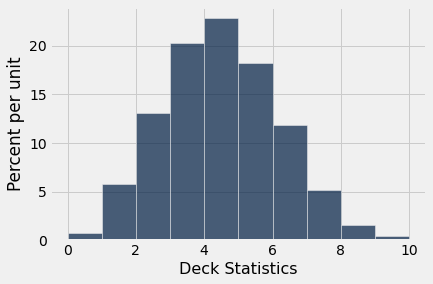

In [81]:
# Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist()

**Question 5.** Given your observed value, do you believe that Jade's model is reasonable, or is our alternative (that our deck is rigged) more likely? Explain your answer using the histogram produced above. **(5 Points)**

```
BEGIN QUESTION
name: q4_5
manual: true
```

**SOLUTION:** 

No; given Jade's model, drawing 8 or more face cards happens around 2% of the time under simulation. This points us to think that our alternative, that the probability of drawing a face card is more than 4/13, is more likely.

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**